In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [204]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [205]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There is a null value in Age column. We will explore and see what to fill the null value with.

In [207]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Age', ylabel='Count'>

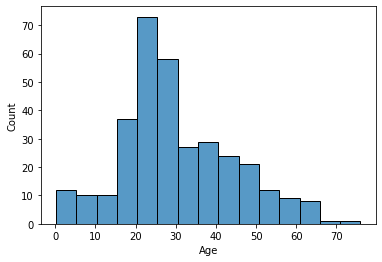

In [208]:
sns.histplot(test.Age)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

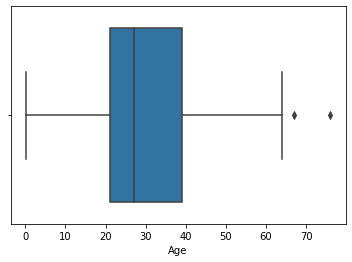

In [209]:
sns.boxplot(test.Age)

Since the distribution isnt skewed and column is numeric, let us fill it with mean.

In [210]:
test.Age=test.Age.fillna(test.Age.mean())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

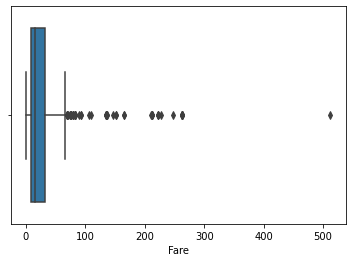

In [211]:
sns.boxplot(test.Fare)

The data is skewed, so we impute the missing value with median.


In [212]:
test.Fare=test.Fare.fillna(test.Fare.median())

In [213]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


since cabin column has too many null values, I dont think it'll have much importance in the prediction.

In [215]:
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [216]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

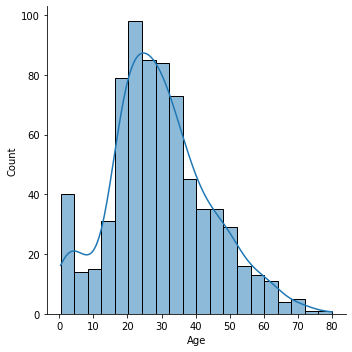

In [217]:
sns.displot(data=train, x='Age',kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

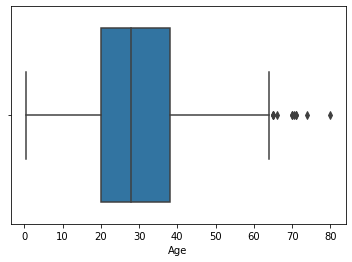

In [218]:
sns.boxplot(train.Age)

In [219]:

train.Age=train.Age.fillna(train.Age.mean())


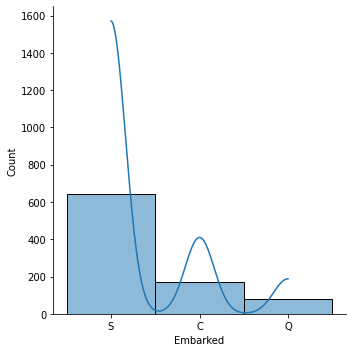

In [220]:
sns.displot(data=train, x='Embarked',kde=True)

We'll fill the missing values in Embarked with mode since its categorical.

In [221]:
train.Embarked=train.Embarked.fillna('S')

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


I'll do some feature engineering and create a new column called family count and see how it fares.

In [223]:
train['famcount']=train['SibSp']+train['Parch']+1
test['famcount']=test['SibSp']+test['Parch']+1

In [224]:
train[['famcount','SibSp','Parch']]

,famcount,SibSp,Parch
0,2,1,0
1,2,1,0
2,1,0,0
3,2,1,0
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,4,1,2
889,1,0,0


In [225]:
test[['famcount','SibSp','Parch']]

,famcount,SibSp,Parch
0,1,0,0
1,2,1,0
2,1,0,0
3,1,0,0
4,3,1,1
...,...,...,...
413,1,0,0
414,1,0,0
415,1,0,0
416,1,0,0


In [226]:
def get_title(name):
    temp = str.split(name,',')[1]
    res = str.split(temp,'.')[0]
    return res
train['Title'] = train['Name'].apply(lambda x:get_title(x))
test['Title'] = test['Name'].apply(lambda x:get_title(x))

In [227]:
train.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

Some titles have a very less count in the data. I'll replace them with mode i.e., masculine titles with Mr. and feminine ones with Miss.

In [228]:
train['Title']=train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'],'Mr',regex=True)
train['Title']=train['Title'].replace(['Ms', 'Lady', 'Mme', 'Don', ' the Countess', 'Mlle'],'Miss',regex=True)



In [229]:
train.Title.value_counts()

 Mr        525
 Miss      187
 Mrs       125
 Master     40
 Dr          7
 Rev         6
Miss         1
Name: Title, dtype: int64

In [230]:
test.Title.value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Title, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Title', ylabel='Survived'>

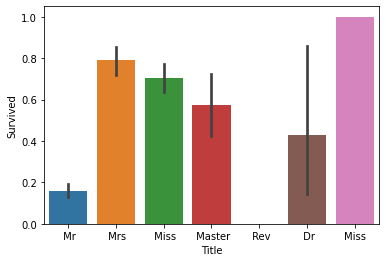

In [231]:
sns.barplot(train.Title,train.Survived)


Dropping some column which I think wont help with the predictions.

In [232]:
train = train.drop(['SibSp','Parch','Name','PassengerId', 'Ticket'],axis=1)
test= test.drop(['SibSp','Parch','Name'],axis=1)

In [233]:
test

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,famcount,Title
0,892,3,male,34.50000,330911,7.8292,Q,1,Mr
1,893,3,female,47.00000,363272,7.0000,S,2,Mrs
2,894,2,male,62.00000,240276,9.6875,Q,1,Mr
3,895,3,male,27.00000,315154,8.6625,S,1,Mr
4,896,3,female,22.00000,3101298,12.2875,S,3,Mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,A.5. 3236,8.0500,S,1,Mr
414,1306,1,female,39.00000,PC 17758,108.9000,C,1,Dona
415,1307,3,male,38.50000,SOTON/O.Q. 3101262,7.2500,S,1,Mr
416,1308,3,male,30.27259,359309,8.0500,S,1,Mr


In [234]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,famcount,Title
0,0,3,male,22.000000,7.2500,S,2,Mr
1,1,1,female,38.000000,71.2833,C,2,Mrs
2,1,3,female,26.000000,7.9250,S,1,Miss
3,1,1,female,35.000000,53.1000,S,2,Mrs
4,0,3,male,35.000000,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,1,Rev
887,1,1,female,19.000000,30.0000,S,1,Miss
888,0,3,female,29.699118,23.4500,S,4,Miss
889,1,1,male,26.000000,30.0000,C,1,Mr


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

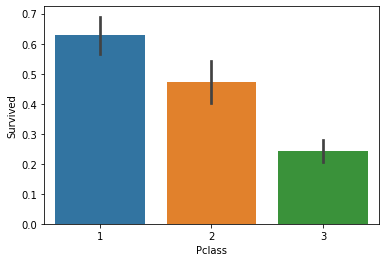

In [235]:
sns.barplot(x=train.Pclass,y=train.Survived)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

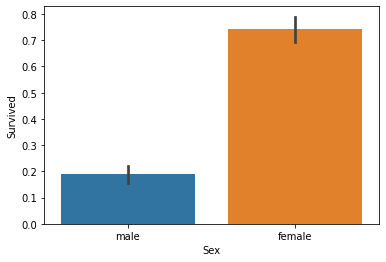

In [236]:
sns.barplot(x=train.Sex,y=train.Survived)

<AxesSubplot:xlabel='Age', ylabel='Count'>

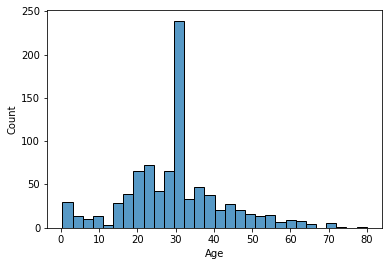

In [237]:
sns.histplot(x=train.Age)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

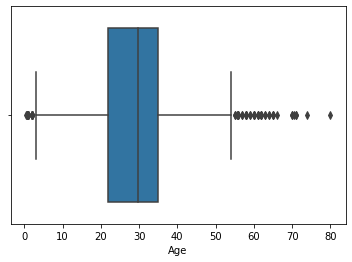

In [238]:
sns.boxplot(train.Age)

too many outliers in the Age column. I'll try to eliminate them by binning.

In [239]:
def age_group(age):
    group = ''
    if (0 <= age <= 3):
        group = 0  # babies and toddlers
    elif (4 <= age <= 18):
        group = 1  # Schooling
    elif (18 <= age <= 40):
        group = 2  # young
    elif (41 <= age <= 60):
        group = 3  # old
    else:
        group = 4  # Old age
    return group
train['Age_Group'] = train['Age'].apply(lambda x:age_group(x))
test['Age_Group'] = test['Age'].apply(lambda x:age_group(x))

Here, we've created a new column called Age Group which classifies them as toddlers, old, young, etc.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

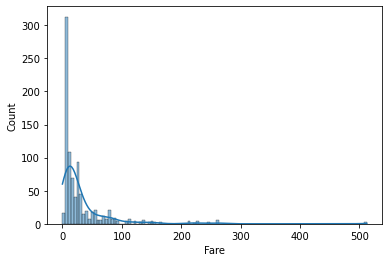

In [240]:
sns.histplot(train.Fare,kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

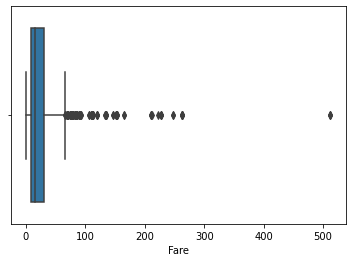

In [241]:
sns.boxplot(train.Fare)

Too many outliers here.

In [242]:
train.Fare = np.asarray(train.Fare).reshape(-1,1)
test.Fare = np.asarray(test.Fare).reshape(-1,1)

I'll identify the outliers using concept of interquartile range

In [243]:
q1=train.Fare.quantile(0.25)
q3=train.Fare.quantile(0.75)
iqr = q3-q1
lower=q1-1.5*iqr
higher=q3+1.5*iqr
higher
outliers=train.Fare[train.Fare>higher]
percent=len(outliers)*100/len(train.Fare)
percent

13.019079685746352

In [244]:
q1t=test.Fare.quantile(0.25)
q3t=test.Fare.quantile(0.75)
iqrt = q3t-q1t
lowert=q1t-1.5*iqrt
highert=q3t+1.5*iqrt
highert
outlierst=test.Fare[test.Fare>highert]
percentt=len(outlierst)*100/len(test.Fare)
percentt

13.157894736842104

In [245]:
outliers

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

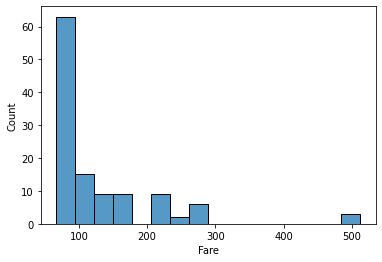

In [246]:
sns.histplot(outliers)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

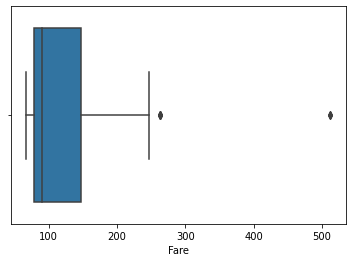

In [247]:
sns.boxplot(outliers)

In [248]:
outliers.median()

90.0

In [249]:
train.loc[train['Fare'] > higher, 'Fare'] = outliers.median()
train.loc[train['Fare'] > higher, 'Fare'] = outliers.median()
test.loc[test['Fare'] > highert, 'Fare'] = outlierst.median()
test.loc[test['Fare'] > highert, 'Fare'] = outlierst.median()

Replacing outliers with their median.

In [250]:
train.Fare

0       7.250
1      90.000
2       7.925
3      53.100
4       8.050
        ...  
886    13.000
887    30.000
888    23.450
889    30.000
890     7.750
Name: Fare, Length: 891, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

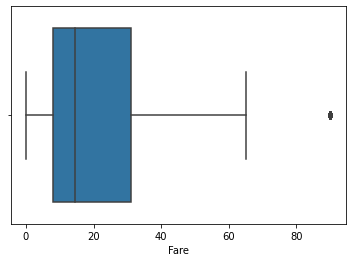

In [251]:
sns.boxplot(train.Fare)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

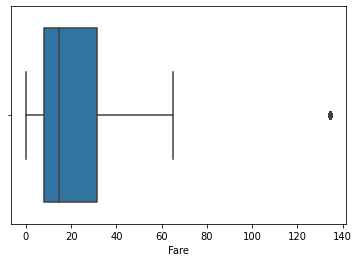

In [252]:
sns.boxplot(test.Fare)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

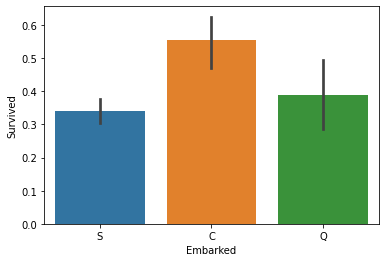

In [253]:
sns.barplot(train.Embarked,train.Survived)

In [254]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,famcount,Title,Age_Group
0,0,3,male,22.000000,7.250,S,2,Mr,2
1,1,1,female,38.000000,90.000,C,2,Mrs,2
2,1,3,female,26.000000,7.925,S,1,Miss,2
3,1,1,female,35.000000,53.100,S,2,Mrs,2
4,0,3,male,35.000000,8.050,S,1,Mr,2
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.000,S,1,Rev,2
887,1,1,female,19.000000,30.000,S,1,Miss,2
888,0,3,female,29.699118,23.450,S,4,Miss,2
889,1,1,male,26.000000,30.000,C,1,Mr,2


In [255]:
test

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,famcount,Title,Age_Group
0,892,3,male,34.50000,330911,7.8292,Q,1,Mr,2
1,893,3,female,47.00000,363272,7.0000,S,2,Mrs,3
2,894,2,male,62.00000,240276,9.6875,Q,1,Mr,4
3,895,3,male,27.00000,315154,8.6625,S,1,Mr,2
4,896,3,female,22.00000,3101298,12.2875,S,3,Mrs,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,A.5. 3236,8.0500,S,1,Mr,2
414,1306,1,female,39.00000,PC 17758,134.5000,C,1,Dona,2
415,1307,3,male,38.50000,SOTON/O.Q. 3101262,7.2500,S,1,Mr,2
416,1308,3,male,30.27259,359309,8.0500,S,1,Mr,2


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='famcount', ylabel='Survived'>

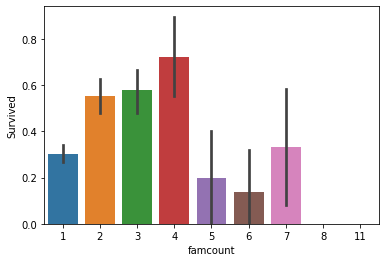

In [256]:
sns.barplot(train.famcount,train.Survived)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='famcount'>

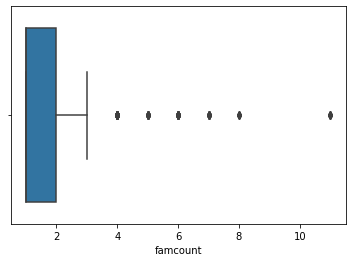

In [257]:
sns.boxplot(train.famcount)

We can furthur apply feature engineering to create a column which might be more useful in predictions.

In [258]:
def fam_type(count):
    group = ''
    if (count == 1):
        group = 0  # alone
    elif (1<count<= 4):
        group =  1 # nuclear family 
    else:
         group = 2  # joint family
    return group
train['fam_type'] = train['famcount'].apply(lambda x:fam_type(x))
test['fam_type'] = test['famcount'].apply(lambda x:fam_type(x))

train=train.drop(['famcount','Age'],axis=1)
test=test.drop(['famcount','Age'],axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fam_type', ylabel='Survived'>

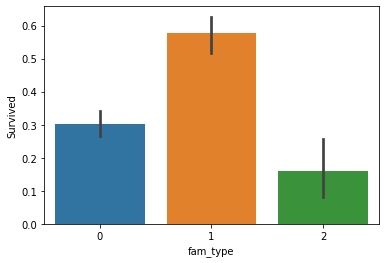

In [259]:
sns.barplot(train.fam_type,train.Survived)

In [260]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.Sex=le.fit_transform(train.Sex)
train.Title=le.fit_transform(train.Title)
train.Embarked=le.fit_transform(train.Embarked)
test.Sex=le.fit_transform(test.Sex)
test.Title=le.fit_transform(test.Title)
test.Embarked=le.fit_transform(test.Embarked)


<AxesSubplot:>

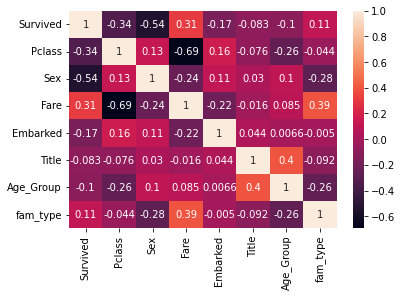

In [262]:
sns.heatmap(train.corr(),annot=True)

In [263]:
test=test.drop('Ticket',axis=1)

In [266]:
x_test = test.drop('PassengerId',axis=1)
y_train = train['Survived']
x_train = train[x_test.columns]

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

Applying some hyper parameter tuning for Logistic regression model.

In [267]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

from sklearn.model_selection import GridSearchCV
grid = {"C": np.logspace(-3,3,7), "penalty": ["l1", "l2"]}
log_model_cv = GridSearchCV(m1, grid, cv=10)
log_model_cv.fit(train_x, train_y)

log_model_cv.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 0.1, 'penalty': 'l2'}

In [269]:
train

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_Group,fam_type
0,0,3,1,7.250,2,3,2,1
1,1,1,0,90.000,0,4,2,1
2,1,3,0,7.925,2,2,2,0
3,1,1,0,53.100,2,4,2,1
4,0,3,1,8.050,2,3,2,0
...,...,...,...,...,...,...,...,...
886,0,2,1,13.000,2,5,2,0
887,1,1,0,30.000,2,2,2,0
888,0,3,0,23.450,2,2,2,1
889,1,1,1,30.000,0,3,2,0


In [270]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(C= 0.1, penalty= 'l2')
m1.fit(train_x,train_y)

from sklearn.tree import DecisionTreeClassifier
m2= DecisionTreeClassifier()
m2.fit(train_x,train_y)

from sklearn.ensemble import GradientBoostingClassifier
m3=  GradientBoostingClassifier()
m3.fit(train_x,train_y)

from sklearn import svm
m4 = svm.SVC()
m4.fit(x_train,y_train)

In [271]:
from sklearn.metrics import accuracy_score
pred1=m1.predict(valid_x)
print(accuracy_score(pred1,valid_y))

pred2=m2.predict(valid_x)
print(accuracy_score(pred2,valid_y))

pred3=m3.predict(valid_x)
print(accuracy_score(pred3,valid_y))

pred4=m4.predict(valid_x)
print(accuracy_score(pred4,valid_y))

0.8097014925373134
0.7873134328358209
0.8097014925373134
0.6791044776119403


In [272]:
y_pred = m1.predict(x_test)
X_test_passenger = test['PassengerId']
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [273]:
out_df = pd.concat([X_test_passenger, pd.DataFrame(y_pred)], axis=1)

In [274]:
out_df.columns = ['PassengerId','Survived']

In [276]:
out_df.to_csv('random.csv', index=False)

Accuracy Score: 0.75598 in competition
Rank in Leaderboard: 11622